In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from scipy.stats import norm
from numpy import vstack

In [ ]:
# # objective function
# def objective(x, noise=0.1):
# 	noise = np.random.normal(loc=0, scale=noise)
# 	return (x**2 * np.sin(5 * np.pi * x)**6.0) + noise

In [ ]:
# surrogate or approximation for the objective function
def surrogate(model, X):
 # catch any warning generated when making a prediction
 with catch_warnings():
 # ignore generated warnings
  simplefilter("ignore")
 return model.predict(X, return_std=True)

In [ ]:
#define the PI acquisition function
def acquisition(X, Xsamples, model):
 # calculate the best surrogate score found so far
 yhat, _ = surrogate(model, X)
 best = max(yhat)
 # calculate mean and stdev via surrogate function
 mu, std = surrogate(model, Xsamples)
 mu = mu[:, 0]
 # calculate the probability of improvement
 probs = norm.cdf((mu - best) / (std+1E-9))
 return probs

In [ ]:
#find at which point is the acquisition function maximum (optimum)--JUST THATS IT --> THIS IS ALL WE ARE DOING IN THIS CELL
# optimize the acquisition function
def opt_acquisition(X, y, model):
 # random search, generate random samples
 Xsamples = np.random.random(100)
 Xsamples = Xsamples.reshape(len(Xsamples), 1)
 # calculate the acquisition function for each sample
 scores = acquisition(X, Xsamples, model)
 # locate the index of the largest scores
 ix = np.argmax(scores)
 return Xsamples[ix, 0]

In [ ]:
# plot real observations vs surrogate function
def plot(X, y, model):
 # scatter plot of inputs and real objective function
 plt.scatter(X, y, label = 'These are actual data points')
 # line plot of surrogate function across domain
 Xsamples = np.asarray(np.arange(0, 1, 0.001))
 Xsamples = Xsamples.reshape(len(Xsamples), 1)
 ysamples, _ = surrogate(model, Xsamples)
 plt.plot(Xsamples, ysamples, '-r', label = 'Using surrogate fn we have predicted that this should be the curve')
 plt.legend()
 # show the plot
 plt.show()

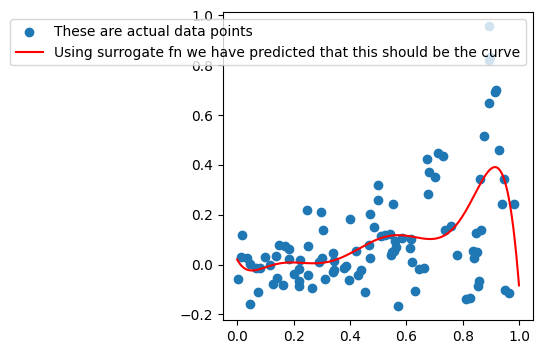

In [ ]:
# sample the domain sparsely with noise
X = np.random.random(100)
y = np.asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process

In [ ]:
# grid-based sample of the domain [0,1]
# X = np.arange(0, 1, 0.01)

In [ ]:
# sample the domain without noise
# y = [objective(x, 0) for x in X]

In [ ]:
# # sample the domain with noise
# ynoise = [objective(x) for x in X]

In [ ]:
# # find best result
# ix = np.argmax(y)
# print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [ ]:
# plt.rcParams["figure.figsize"] = (4,4)
# # plot the points with noise
# plt.scatter(X, ynoise, label = 'This is the data we have')
# # plot the points without noise
# plt.plot(X, y, '-r', label = 'We dont know this')
# plt.legend()
# # show the plot
# plt.show()

 In the above graph, blue points represent the '12' data points we have and red curve is the actual relation between the input and 
the output which we do not know. It is just here that we would compare at the end that how close can we get to the real function using BO that this example is used. You would NEVER KNOW THE RED CURVE IF YOU ARE USNIG BO.

In [ ]:
# # sample the domain sparsely with noise
# X = np.random(100)
# y = np.asarray([objective(x) for x in X])
# # reshape into rows and cols
# X = X.reshape(len(X), 1)
# y = y.reshape(len(y), 1)

In [ ]:
# # define the model
# model = GaussianProcessRegressor()
# # fit the model
# model.fit(X, y)
# # plot the surrogate function
# plot(X, y, model)

Things done till now:
We have input X and the output values y.
We plot a scatter plot between X and y which is just like plotting what we saw while doing the experiment. 
Now we use GP regressor as the surrogate model and inside the 'def surrogate' function using GPRegressor.predict we propose an approximation for what can be the relation between the input X and output y. 

# NOW WE BEGIN THE OPTIMISATION PROCESS

In [ ]:
for i in range(100):

 # select the next point to sample
 ##ask the acquisition function to tell me which point shoudl I sample next 
 x = opt_acquisition(X, y, model)
 ##the acquisition function tell me that this 'x' is the next point where you should get the next value of y

 # sample the point
 actual = objective(x) #this line tells us nothing BUT
 ##THE ACTUAL VALUE at the 'x' which should have been had we known the objective function. IN MY CASE I CAN NOT WRITE THIS LINE. 
 ##NOR CAN ANYONE WHO IS DOING BO IN THE REAL WORLD BECAUSE THEY WOULD NOT KNOW THE TRUE OBJECTIVE FUNCTION SO HOW WOULD THEY
 ##FIND THE VALUE OF THE OBJECTIVE FUNCTION AT THIS VALUE OF 'x'. THEY SIMPLY DO NOT HAVE THID DATA POINT ('x', y) IN THEIR 
 ##EXPERIMENTAL RECORDINGS

 # summarize the finding
 est, _ = surrogate(model, [[x]])
 print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
 ##now we take this point 'x' evaluate its value using surrogate
 ##and add this data to the information we know
 # add the data to the dataset
 X = vstack((X, [[x]]))
 y = vstack((y, [[actual]]))
 # update the model
 model.fit(X, y)

IndexError: ignored

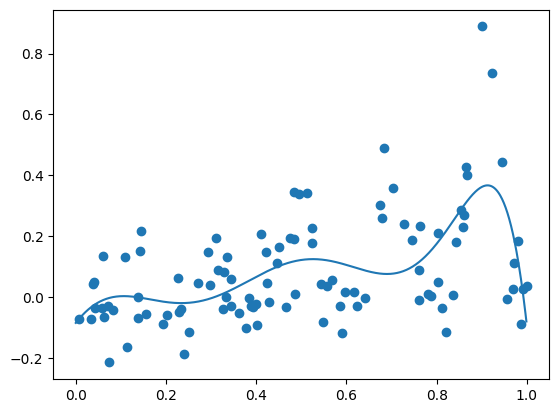

>x=0.017, f()=-0.056, actual=0.217
>x=0.905, f()=0.363, actual=0.684
>x=0.910, f()=0.399, actual=0.910
>x=0.916, f()=0.451, actual=0.593
>x=0.503, f()=0.128, actual=0.434
>x=0.729, f()=0.068, actual=0.061
>x=0.129, f()=-0.005, actual=-0.070
>x=0.917, f()=0.466, actual=0.799
>x=0.916, f()=0.494, actual=0.552
>x=0.916, f()=0.498, actual=0.705
>x=0.808, f()=0.214, actual=-0.057
>x=0.006, f()=0.007, actual=-0.116
>x=0.621, f()=0.085, actual=-0.058
>x=0.918, f()=0.512, actual=0.621
>x=0.916, f()=0.519, actual=0.555
>x=0.819, f()=0.237, actual=-0.011
>x=0.812, f()=0.203, actual=-0.107
>x=0.036, f()=-0.012, actual=-0.087
>x=0.029, f()=-0.023, actual=-0.313
>x=0.584, f()=0.114, actual=0.141
>x=0.922, f()=0.515, actual=0.412
>x=0.921, f()=0.509, actual=0.711
>x=0.000, f()=-0.081, actual=0.074
>x=0.488, f()=0.146, actual=0.146
>x=0.184, f()=-0.019, actual=0.114
>x=0.684, f()=0.022, actual=0.276
>x=0.281, f()=-0.017, actual=0.059
>x=0.807, f()=0.178, actual=-0.096
>x=0.921, f()=0.516, actual=0.79

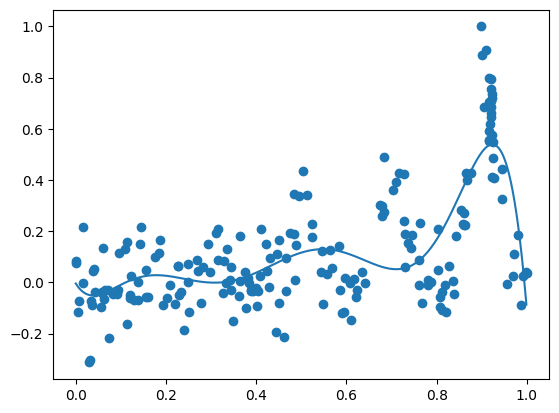

Best Result: x=0.899, y=1.000


In [2]:
# example of bayesian optimization for a 1d function from scratch
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:,]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%.3f, actual=%.3f' % (x, est[0], actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))


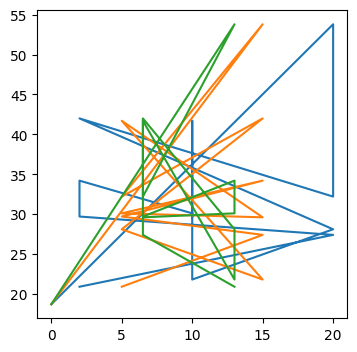

In [ ]:
X = np.array([[2, 5, 13], [20, 15, 6.5], [2, 5, 6.5], [2, 15, 13], [10, 5, 13], [10, 15, 6.5], [10, 5, 6.5], [10, 15, 13], [20, 5, 13], [2, 15, 6.5], [20, 5, 6.5], [20, 15, 13], [0, 0, 0]])
Y = np.array([20.9, 27.4, 29.7, 34.2, 30.1, 29.6, 41.7, 21.8, 28.1, 42, 32.2, 53.8, 18.7])

plt.plot(X,Y)